<a href="https://colab.research.google.com/github/Helllcat/NumPy/blob/main/news_data_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
-*import pandas as pd
df=pd.read_csv("/content/news-data.csv",nrows=2000)
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
df.isnull().sum()

,0
publish_date,0
headline_text,0


In [ ]:
df.drop(['publish_date'],axis=1,inplace=True)

KeyError: "['publish_date'] not found in axis"

In [ ]:
news=df.headline_text


In [ ]:
news=news.str.replace("[^a-z A-Z]+","",regex=True)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
wt=word_tokenize

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
wt=word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
news = news.apply(lambda x: " ".join([wn.lemmatize(i.lower(), pos="v") for i in wt(x)]))
news

,headline_text
0,aba decide against community broadcast licence
1,act fire witness must be aware of defamation
2,a g call for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
1995,foreign donations ok for brisbane base senate
1996,former mayor speak out over mismanagement report
1997,fraser share lead as wind sweep adelaide course
1998,fuel price tip to jump further


In [ ]:
import nltk
from nltk.corpus import stopwords
sw=stopwords.words("english")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
news=news.apply(lambda x:" ".join([i for i in x.split() if i not in sw]))
news

,headline_text
0,aba decide community broadcast licence
1,act fire witness must aware defamation
2,g call infrastructure protection summit
3,air nz staff aust strike pay rise
4,air nz strike affect australian travellers
...,...
1995,foreign donations ok brisbane base senate
1996,former mayor speak mismanagement report
1997,fraser share lead wind sweep adelaide course
1998,fuel price tip jump


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(news)

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

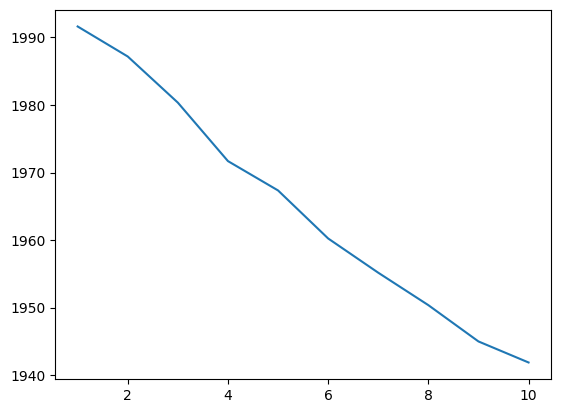

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [ ]:
km=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_predict=km.fit_predict(x)
y_predict

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(x,y_predict)

np.float64(0.003186249419304999)